In [1]:
import yt
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3/object


Things that I still have to fix: 
- pressure/temperature
- change size of the box and size of sphere 
- ~~activate AMR~~
- put a sink particle at the center 


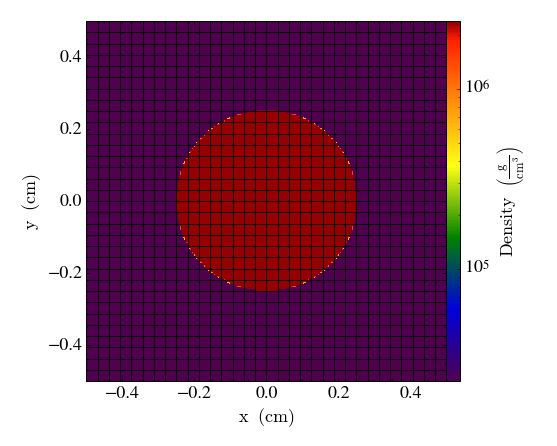


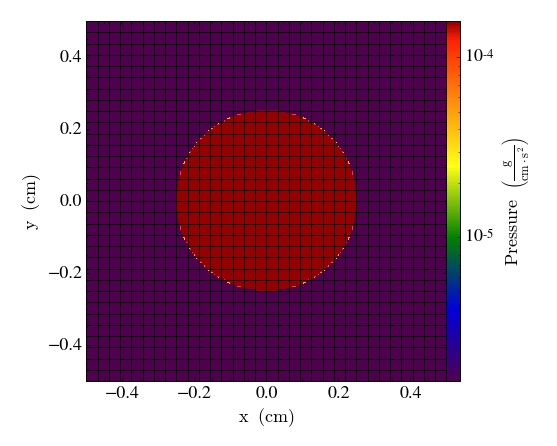


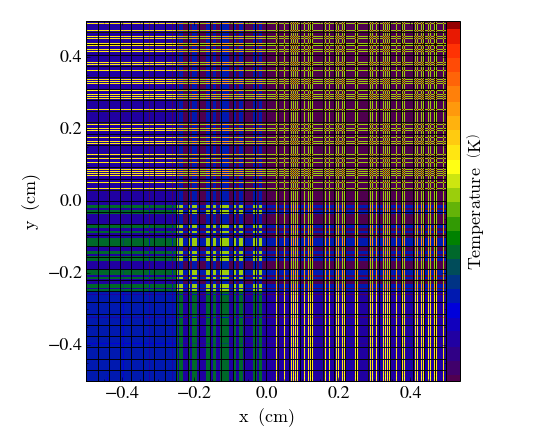

In [7]:
i =0 
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

Okay this eliminates the triple loop but then we are back to the original implementation where pressure is off 

Also trying the plt file but that doesnt contain velocity and grid information 


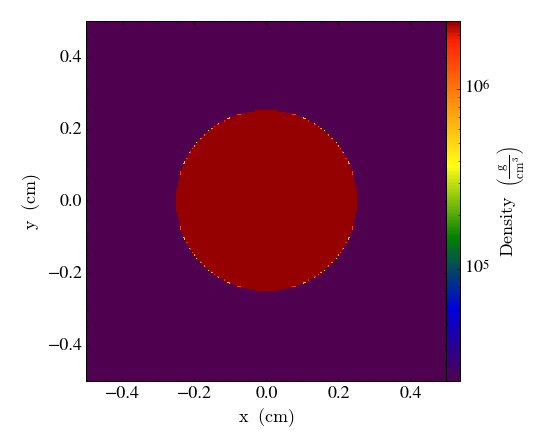


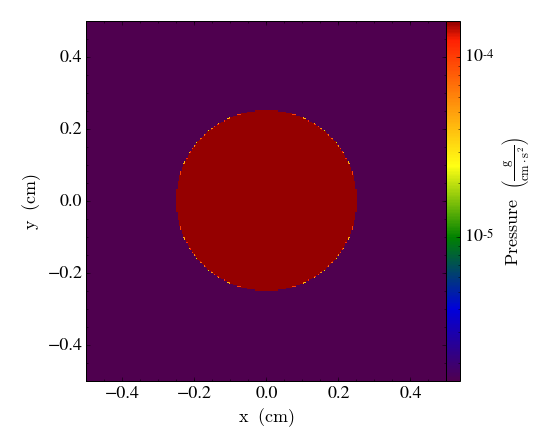


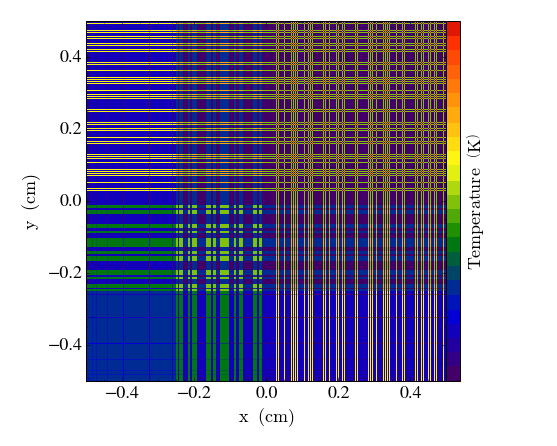

In [9]:
i =0 
ds = yt.load("uniform_sphere_hdf5_plt_cnt_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
# slc.annotate_velocity()
# slc.annotate_grids()
slc.show()

physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
# slc.annotate_velocity()
# slc.annotate_grids()
slc.show()

physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
# slc.annotate_velocity()
# slc.annotate_grids()
slc.show()


Checking that velocity is actually zero initially 


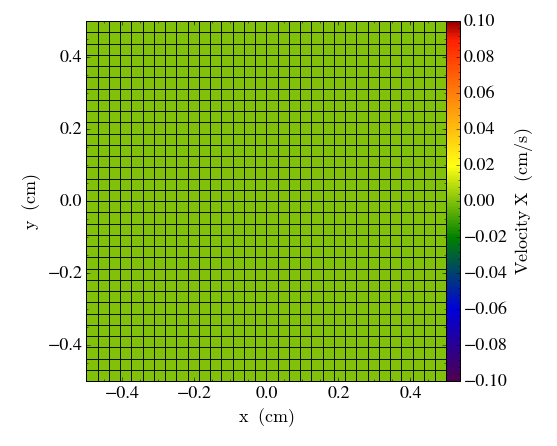

In [11]:
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="velocity_x"
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

Changed the pressure to explicit value 59 rather than P 

In [3]:
def plot_all(i=0):
    ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)
    slc.set_figure_size(5)
    slc.annotate_velocity()
    slc.annotate_grids()
    slc.show()

    physical_quantity="pressure"
    slc = yt.SlicePlot(ds, "z",physical_quantity)
    slc.set_figure_size(5)
    slc.annotate_velocity()
    slc.annotate_grids()
    slc.show()

    physical_quantity="temperature"
    slc = yt.SlicePlot(ds, "z",physical_quantity)
    slc.set_figure_size(5)
    slc.annotate_velocity()
    slc.annotate_grids()
    slc.show()


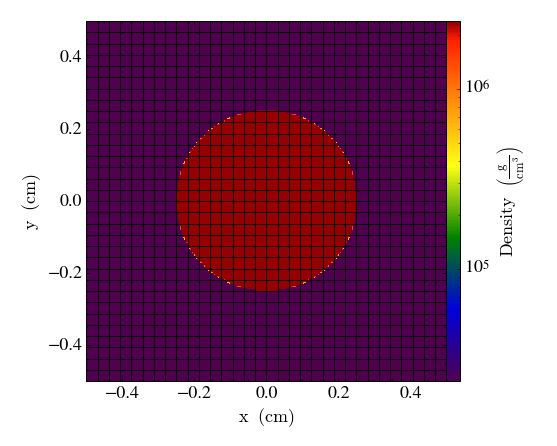


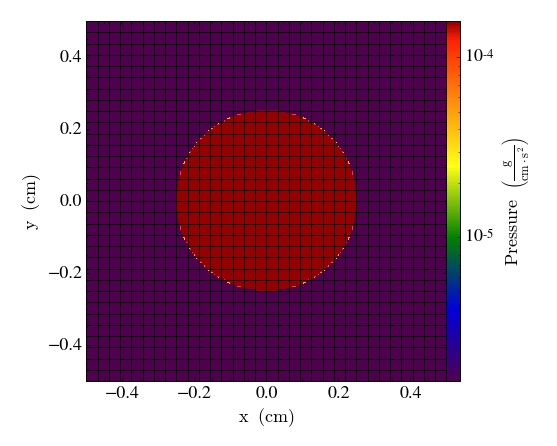


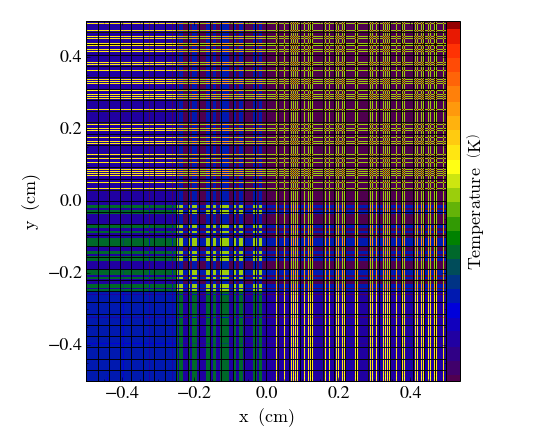

In [5]:
plot_all()


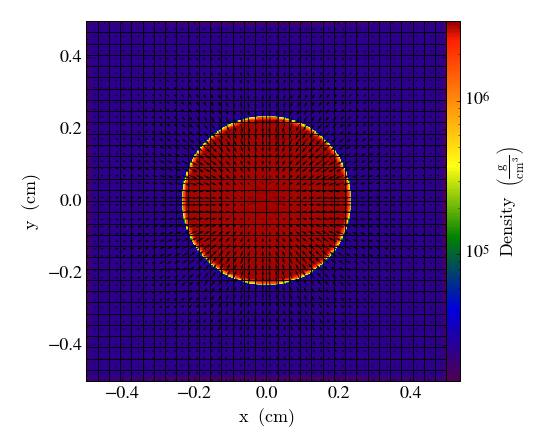


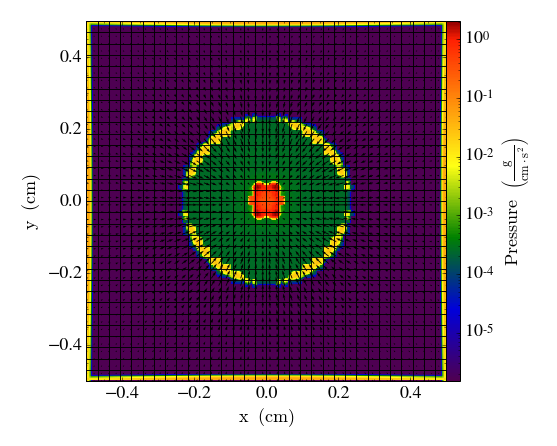


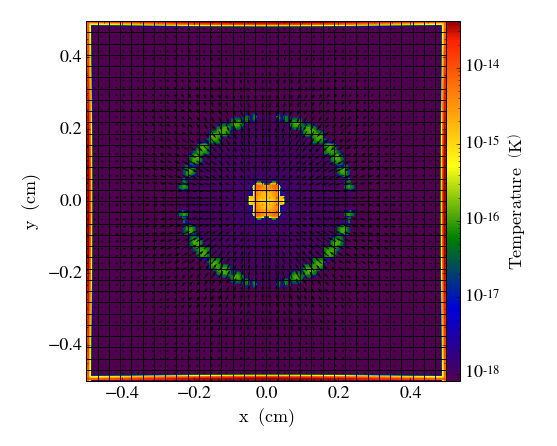

In [7]:
plot_all(5)

Included now the Flash.h declaration so that PRESVAR is defined 

/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:701: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:711: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength



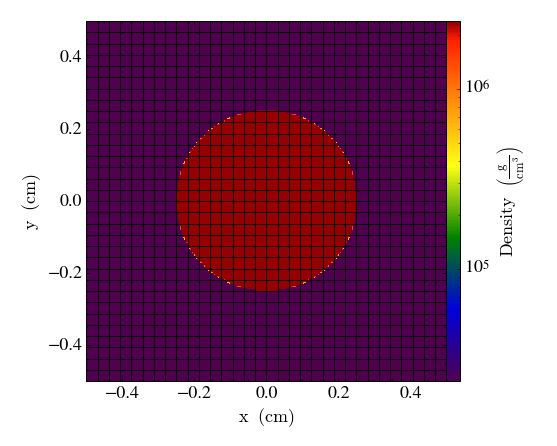


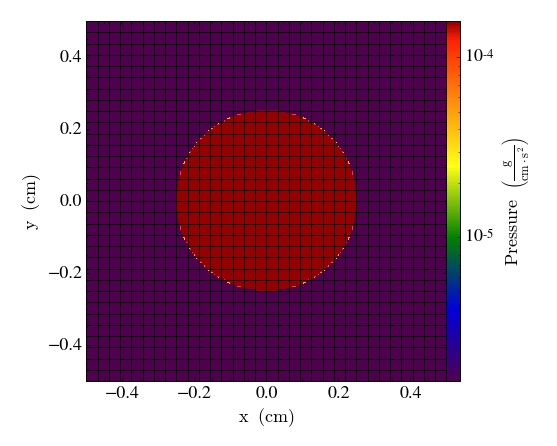


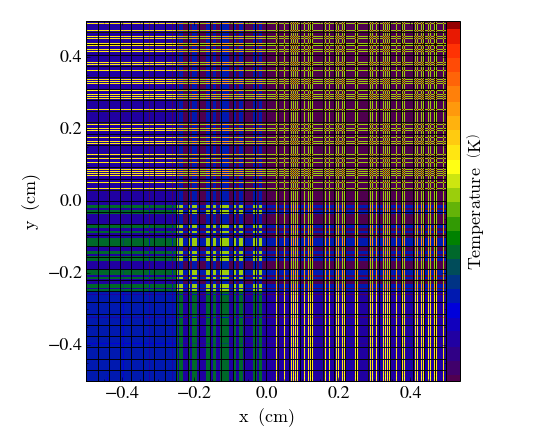

In [5]:
plot_all()

now I changed this back to being about to actually use Grid_putPointData

/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:701: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:711: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength



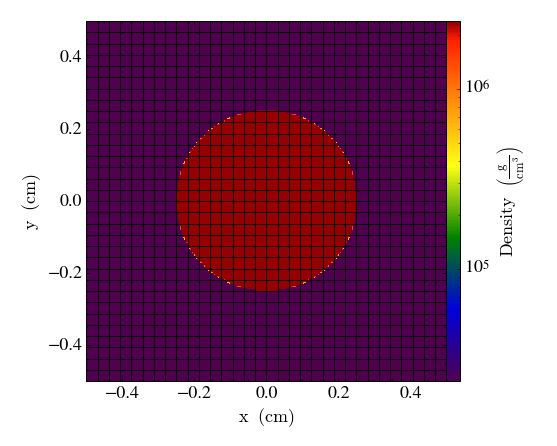


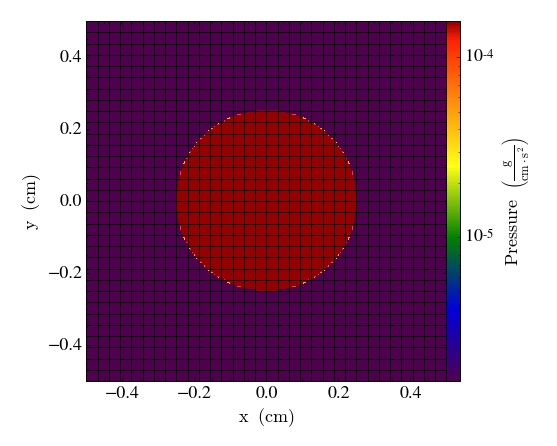


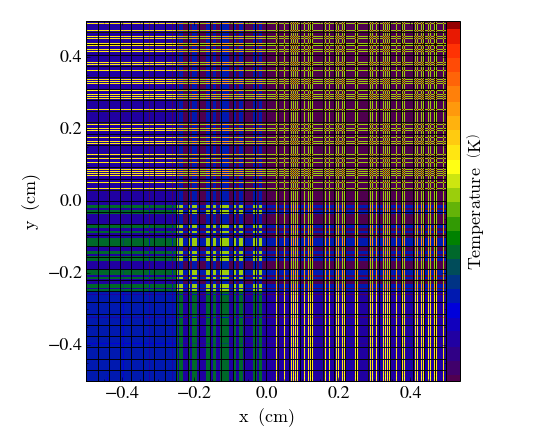

In [4]:
plot_all(0)

Both method works but still gave the same result of P weird 

Okay what happens if I tried to set P as a huge value ? because I suspect that nothing is even getting written in to this 


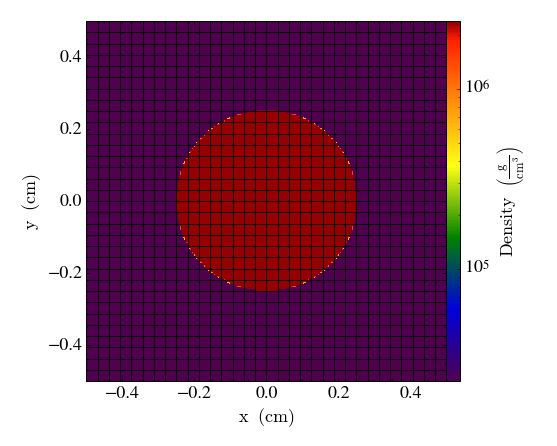


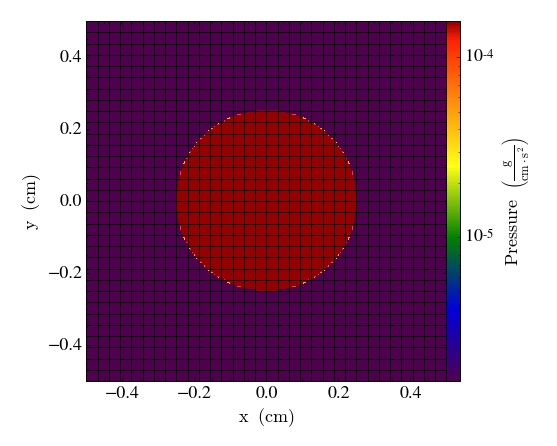


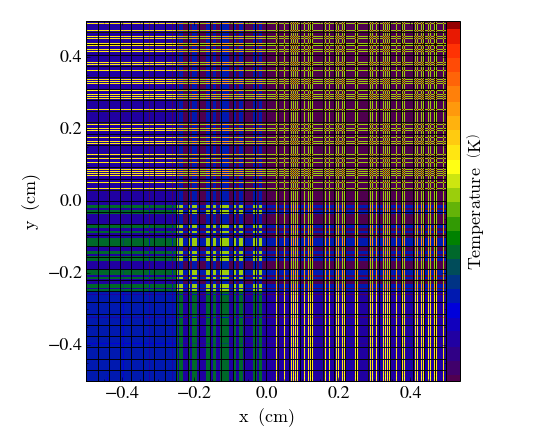

In [6]:
plot_all(0)


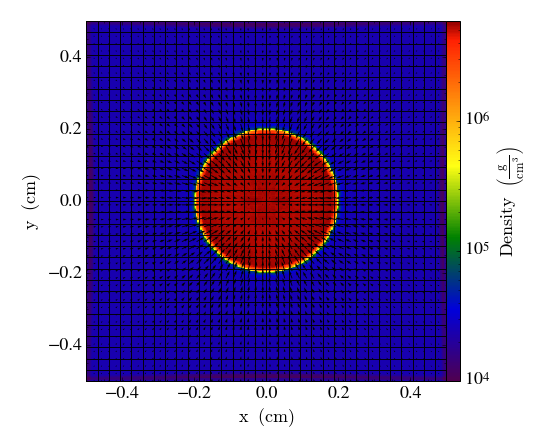


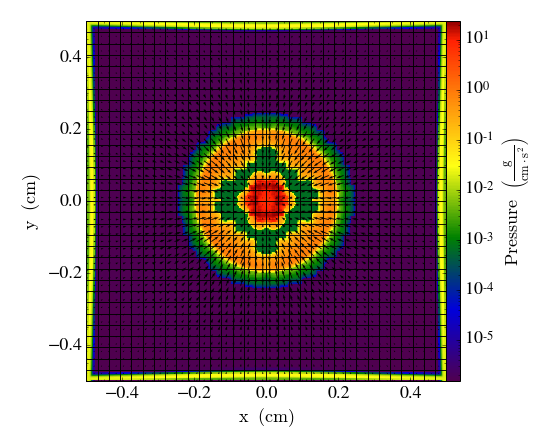


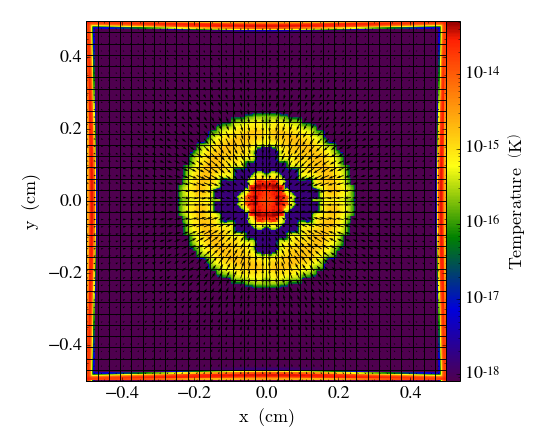

In [7]:
plot_all(8)

Ok this is confirmed that the pressure is not getting initialized at all 